In [37]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel("faltas_treinamento_sujo.xlsx")

display(df)

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
0,Colaborador_001,Operações,Manhã,14,Quarta,18/01/2024,Sim
1,Colaborador_002,Operações,Manhã,1,Segunda,31/02/2024,Não
2,Colaborador_003,Vendas,Manhã,3,segunda,10/03/2024,Não
3,Colaborador_004,Marketing,manha,3,Segunda,21/01/2024,Não
4,Colaborador_005,RH,manha,1,Quarta,18/02/2024,Não
...,...,...,...,...,...,...,...
219,Colaborador_056,Operações,Tarde,2,segunda,05/01/2024,Não
220,Colaborador_102,Vendas,manha,3,segunda,15/02/2024,Não
221,Colaborador_188,Vendas,Manhã,3,segunda,04/02/2024,NaN
222,Colaborador_147,Marketing,Tarde,1,segunda,02/02/2024,Não


In [38]:
#a) Verifique valores nulos e tipos incorretos.
#b) Corrija a coluna de datas inválidas.
#c) Normalize os nomes dos turnos e dias da semana.

# Contar os valores ausentes
print(df.isnull().sum())


df['Nome'].str.split().str.title()

df['Departamento'].str.split().str.title()

df['Turno'].str.split().str.title()
df["Turno"] = df["Turno"].str.title().replace({"manha": "Manhã"})

df['Faltas'].astype(int)

df['Dia_da_Semana_Ultima_Falta'].str.split().str.title()
df["Dia_da_Semana_Ultima_Falta"] = df["Dia_da_Semana_Ultima_Falta"].str.title().replace({"segunda": "Segunda"})

df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'], errors= 'coerce')

df['Evadiu'].str.split().str.title()

print(df)



Nome                           0
Departamento                   0
Turno                          0
Faltas                         0
Dia_da_Semana_Ultima_Falta     0
Data_Ultima_Falta              0
Evadiu                        14
dtype: int64
                Nome Departamento  Turno  Faltas Dia_da_Semana_Ultima_Falta  \
0    Colaborador_001    Operações  Manhã      14                     Quarta   
1    Colaborador_002    Operações  Manhã       1                    Segunda   
2    Colaborador_003       Vendas  Manhã       3                    Segunda   
3    Colaborador_004    Marketing  Manha       3                    Segunda   
4    Colaborador_005           RH  Manha       1                     Quarta   
..               ...          ...    ...     ...                        ...   
219  Colaborador_056    Operações  Tarde       2                    Segunda   
220  Colaborador_102       Vendas  Manha       3                    Segunda   
221  Colaborador_188       Vendas  Manhã     

C:\Users\guitc\AppData\Local\Temp\ipykernel_20300\33095675.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'], errors= 'coerce')


In [39]:

# Exercício 2 – Remoção e Substituição
# a) Remova os registros duplicados.
# b) Substitua os valores nulos da coluna Evadiu por “Desconhecido”.
# c) Substitua os valores nulos da coluna Data_Ultima_Falta pela data mais comum.

df = df.drop_duplicates(subset = ["Nome"])

df["Evadiu"].fillna("Desconhecido", inplace = True)

df["Data_Ultima_Falta"].fillna(df["Data_Ultima_Falta"].mode(), inplace = True)
print(df)

display(df)



                Nome Departamento  Turno  Faltas Dia_da_Semana_Ultima_Falta  \
0    Colaborador_001    Operações  Manhã      14                     Quarta   
1    Colaborador_002    Operações  Manhã       1                    Segunda   
2    Colaborador_003       Vendas  Manhã       3                    Segunda   
3    Colaborador_004    Marketing  Manha       3                    Segunda   
4    Colaborador_005           RH  Manha       1                     Quarta   
..               ...          ...    ...     ...                        ...   
214  Colaborador_215    Operações  Tarde       3                    Segunda   
215  Colaborador_216    Operações  Manha       1                    Segunda   
216  Colaborador_217   Financeiro  Tarde       2                    Segunda   
217  Colaborador_218           RH  Tarde       1                      Terça   
218  Colaborador_219   Financeiro  Manhã       0                      Sexta   

    Data_Ultima_Falta Evadiu  
0          2024-01-1

C:\Users\guitc\AppData\Local\Temp\ipykernel_20300\2192470728.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Evadiu"].fillna("Desconhecido", inplace = True)
C:\Users\guitc\AppData\Local\Temp\ipykernel_20300\2192470728.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
0,Colaborador_001,Operações,Manhã,14,Quarta,2024-01-18,Sim
1,Colaborador_002,Operações,Manhã,1,Segunda,2024-03-24,Não
2,Colaborador_003,Vendas,Manhã,3,Segunda,2024-03-10,Não
3,Colaborador_004,Marketing,Manha,3,Segunda,2024-01-21,Não
4,Colaborador_005,RH,Manha,1,Quarta,2024-02-18,Não
...,...,...,...,...,...,...,...
214,Colaborador_215,Operações,Tarde,3,Segunda,2024-02-09,Não
215,Colaborador_216,Operações,Manha,1,Segunda,2024-03-28,Não
216,Colaborador_217,Financeiro,Tarde,2,Segunda,2024-01-24,Não
217,Colaborador_218,RH,Tarde,1,Terça,2024-02-07,Não


In [40]:
# Exercício 3 – Correções e Detecção de Outliers
# a) Converta a coluna Faltas para tipo inteiro.
# b) Substitua outliers de faltas por np.nan e depois pela mediana.
# c) Crie um flag “Faltas_Suspeitas” para valores &gt; 10.


# b) Substituir outliers por np.nan
# Calcular os quartis Q1 e Q3
Q1 = df['Faltas'].quantile(0.25)
Q3 = df['Faltas'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Faltas'] < limite_inferior) | (df['Faltas'] > limite_superior)]

# print("Outliers:")
# print(outliers)

df.loc[(df['Faltas'] < limite_inferior) | (df['Faltas'] > limite_superior), 'Faltas'] = np.nan


# np.nan = df["Faltas"].median()
#df.loc[np.nan].replace(df['Faltas'].median())
#df.loc[(df['Faltas'] == "NaN", 'Faltas')].replace("NaN",df['Faltas'].median())

df['Faltas'].fillna(df['Faltas'].median(), inplace=True)
# # Preencher os NaNs com a mediana da coluna

#df.loc[df['Faltas'] > 10, 'Faltas'] = 'Faltas Suspeitas'

display(df)



C:\Users\guitc\AppData\Local\Temp\ipykernel_20300\3207371055.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Faltas'].fillna(df['Faltas'].median(), inplace=True)


,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
0,Colaborador_001,Operações,Manhã,2.0,Quarta,2024-01-18,Sim
1,Colaborador_002,Operações,Manhã,1.0,Segunda,2024-03-24,Não
2,Colaborador_003,Vendas,Manhã,3.0,Segunda,2024-03-10,Não
3,Colaborador_004,Marketing,Manha,3.0,Segunda,2024-01-21,Não
4,Colaborador_005,RH,Manha,1.0,Quarta,2024-02-18,Não
...,...,...,...,...,...,...,...
214,Colaborador_215,Operações,Tarde,3.0,Segunda,2024-02-09,Não
215,Colaborador_216,Operações,Manha,1.0,Segunda,2024-03-28,Não
216,Colaborador_217,Financeiro,Tarde,2.0,Segunda,2024-01-24,Não
217,Colaborador_218,RH,Tarde,1.0,Terça,2024-02-07,Não


In [41]:
# Exercício 4 – Análise Descritiva Avançada
# a) Qual o número total de evasões por departamento?
# b) Qual é o percentual de evasão considerando apenas os que participaram do turno da tarde?
# c) Qual é o desvio padrão de faltas por turno?

Evasao = df.loc[df['Evadiu'] == "Sim", 'Faltas'].count()
print('*'*50)
print("Evasão Total")
print(Evasao)

Evasao_Tarde = df.loc[(df['Turno'] == "Tarde") & (df['Evadiu'] == "Sim"), 'Faltas'].count()
print('*'*50)
print("Evasão Tarde")
print(Evasao_Tarde)

#Desvio_Falta = df['Faltas'].pct_change()*100

Desvio_Falta = df.groupby('Turno')['Faltas'].std()
print('*'*50)
print("Desvio padrão por falta")
print(Desvio_Falta)

**************************************************
Evasão Total
21
**************************************************
Evasão Tarde
10
**************************************************
Desvio padrão por falta
Turno
Manha    1.195879
Manhã    1.570450
Tarde    1.430269
Name: Faltas, dtype: float64


In [42]:
# Exercício 5 – Análise Temporal
# a) Em qual mês ocorreu o maior número de faltas?
# b) Crie uma coluna Semana_Ultima_Falta e descubra qual semana teve maior concentração de
# ausências.
# c) Faça uma análise cruzando dia da semana e quantidade de evasões.

df['Data_Mes'] = df['Data_Ultima_Falta'].dt.to_period('M')

Mes_Mais_Faltas = df.groupby('Data_Mes')['Faltas'].count()
print('*'*50)
print(Mes_Mais_Faltas)

df['Semana_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.to_period('W')

Semana_Mais_Faltas = df.groupby('Semana_Ultima_Falta')['Faltas'].count()
print('*'*50)
print(Semana_Mais_Faltas)

Dia_Mais_Faltas = df.groupby('Dia_da_Semana_Ultima_Falta')['Faltas'].count()
print('*'*50)
print(Dia_Mais_Faltas)




**************************************************
Data_Mes
2024-01    68
2024-02    70
2024-03    70
Freq: M, Name: Faltas, dtype: int64
**************************************************
Semana_Ultima_Falta
2024-01-01/2024-01-07    19
2024-01-08/2024-01-14    14
2024-01-15/2024-01-21    17
2024-01-22/2024-01-28    11
2024-01-29/2024-02-04    16
2024-02-05/2024-02-11    19
2024-02-12/2024-02-18    20
2024-02-19/2024-02-25    14
2024-02-26/2024-03-03    14
2024-03-04/2024-03-10     7
2024-03-11/2024-03-17    20
2024-03-18/2024-03-24    22
2024-03-25/2024-03-31    15
Freq: W-SUN, Name: Faltas, dtype: int64
**************************************************
Dia_da_Semana_Ultima_Falta
Quarta     35
Quinta     37
Segunda    74
Sexta      38
Terça      35
Name: Faltas, dtype: int64


In [43]:
df.to_excel("Teste faltas.xlsx", index=False)

In [44]:
# Exercício 6 – Análise de Risco
# a) Crie a coluna Risco_Evasao com três categorias: Alto, Moderado, Baixo.
# b) Gere uma tabela com a distribuição percentual de risco por departamento.
# c) Há relação entre risco alto e turno da tarde ?




df["Risco_Evasao"] = pd.cut(df["Faltas"], bins = [-1, 2, 4, 10], labels = ["Baixo", "Moderado", "Alto"])

display(df)

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu,Data_Mes,Semana_Ultima_Falta,Risco_Evasao
0,Colaborador_001,Operações,Manhã,2.0,Quarta,2024-01-18,Sim,2024-01,2024-01-15/2024-01-21,Baixo
1,Colaborador_002,Operações,Manhã,1.0,Segunda,2024-03-24,Não,2024-03,2024-03-18/2024-03-24,Baixo
2,Colaborador_003,Vendas,Manhã,3.0,Segunda,2024-03-10,Não,2024-03,2024-03-04/2024-03-10,Moderado
3,Colaborador_004,Marketing,Manha,3.0,Segunda,2024-01-21,Não,2024-01,2024-01-15/2024-01-21,Moderado
4,Colaborador_005,RH,Manha,1.0,Quarta,2024-02-18,Não,2024-02,2024-02-12/2024-02-18,Baixo
...,...,...,...,...,...,...,...,...,...,...
214,Colaborador_215,Operações,Tarde,3.0,Segunda,2024-02-09,Não,2024-02,2024-02-05/2024-02-11,Moderado
215,Colaborador_216,Operações,Manha,1.0,Segunda,2024-03-28,Não,2024-03,2024-03-25/2024-03-31,Baixo
216,Colaborador_217,Financeiro,Tarde,2.0,Segunda,2024-01-24,Não,2024-01,2024-01-22/2024-01-28,Baixo
217,Colaborador_218,RH,Tarde,1.0,Terça,2024-02-07,Não,2024-02,2024-02-05/2024-02-11,Baixo


In [45]:
Risco_por_Departamento = (df.groupby('Departamento')['Faltas'].sum()/df['Faltas'].sum())*100

print(f'{Risco_por_Departamento}')

Departamento
Financeiro    15.311005
Marketing     20.095694
Operações     23.444976
RH            14.114833
TI            12.679426
Vendas        14.354067
Name: Faltas, dtype: float64


In [46]:
Risco_por_Turno = (df.groupby('Turno')['Faltas'].sum()/df['Faltas'].sum())*100

print(Risco_por_Turno)

Turno
Manha    24.880383
Manhã    23.444976
Tarde    51.674641
Name: Faltas, dtype: float64


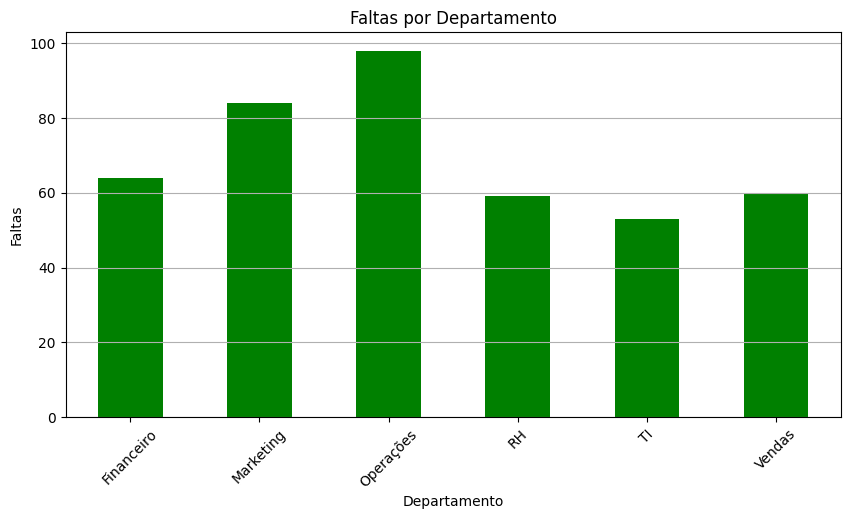

In [47]:
Faltas_por_Departamento = df.groupby('Departamento')['Faltas'].sum()

plt.figure(figsize=(10,5))
Faltas_por_Departamento.plot(kind="bar", color = "green")
plt.title("Faltas por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Faltas")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.show()

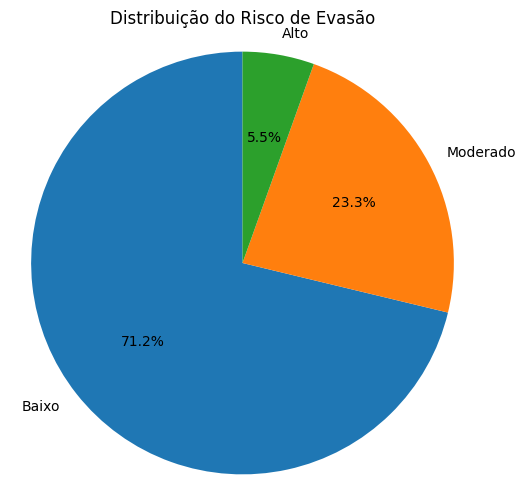

In [48]:
Evasao =  df['Risco_Evasao'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(Evasao, labels=Evasao.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição do Risco de Evasão')
plt.axis('equal') 
plt.show()

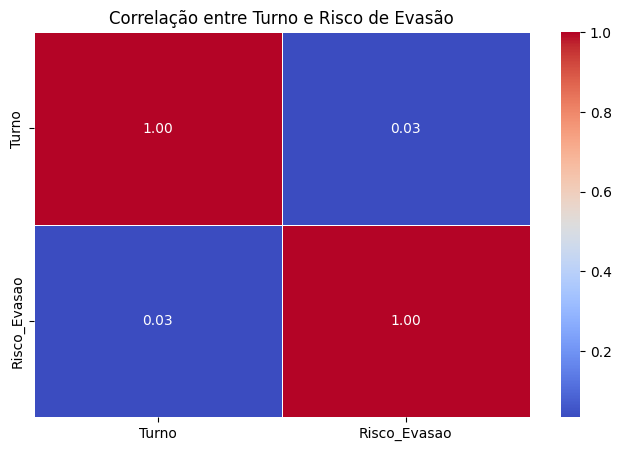

In [57]:
df_temp = df.copy()

# Codifica as variáveis categóricas
le_turno = LabelEncoder()
le_risco = LabelEncoder()

df_temp['Turno'] = le_turno.fit_transform(df_temp['Turno'])
df_temp['Risco_Evasao'] = le_risco.fit_transform(df_temp['Risco_Evasao'])

# Calcula a correlação
corr = df_temp[['Turno', 'Risco_Evasao']].corr()

# Cria o heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlação entre Turno e Risco de Evasão")
plt.show()